### Che-Wei Yeh
### Github ID: Boximao
### USCID: 7415538737

# 1

## (a)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import ttest_ind
from sklearn import datasets, linear_model
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import preprocessing
from matplotlib import image

In [2]:
raw_data=pd.read_excel('Folds5x2_pp.xlsx',sheet_name=0)
data=raw_data.copy()
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## (b)

### (i)

In [3]:
df=pd.DataFrame(data)
rows=len(df.axes[0])
print(f'There are {rows} rows.')

There are 9568 rows.


In [4]:
columns=len(df.axes[1])
print(f'There are {columns} columns.')

There are 5 columns.


In [5]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [6]:
print('Rows represents number of hourly averaged ambient variables collected.')
print('Columns represent Temperature (AT), Ambient Pressure (AP),Relative Humidity (RH) and Exhaust Vacuum (V) and net hourly electrical energy output (PE) of the plant.')

Rows represents number of hourly averaged ambient variables collected.
Columns represent Temperature (AT), Ambient Pressure (AP),Relative Humidity (RH) and Exhaust Vacuum (V) and net hourly electrical energy output (PE) of the plant.


### (ii)

In [7]:
x=df.drop(['PE'],axis=1)
y=df.PE

Text(0.1, -0.1, 'Temperature is inversely proportional to the electrical energy output.')

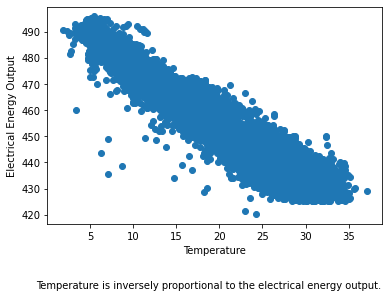

In [8]:
plt.scatter(x=df.AT,y=df.PE)
plt.xlabel('Temperature')
plt.ylabel('Electrical Energy Output')
plt.figtext(x=0.1,y=-0.1,s='Temperature is inversely proportional to the electrical energy output.')

Text(0.1, -0.1, 'Exhaust Vacuum is inversely proportional to the electrical energy output, but the relationship is not as strong as the first one.')

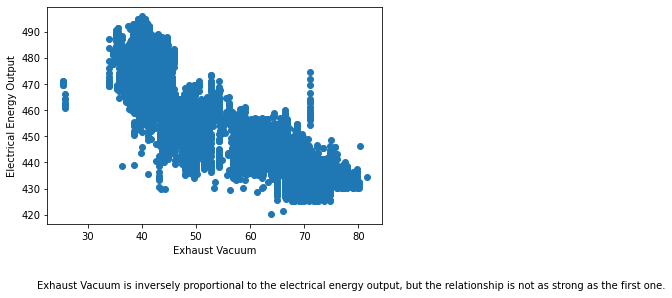

In [9]:
plt.scatter(x=df.V,y=df.PE)
plt.xlabel('Exhaust Vacuum')
plt.ylabel('Electrical Energy Output')
plt.figtext(x=0.1,y=-0.1,s='Exhaust Vacuum is inversely proportional to the electrical energy output, but the relationship is not as strong as the first one.')

Text(0.1, -0.1, 'Ambient pressure and electrical showed little positive proportionality.')

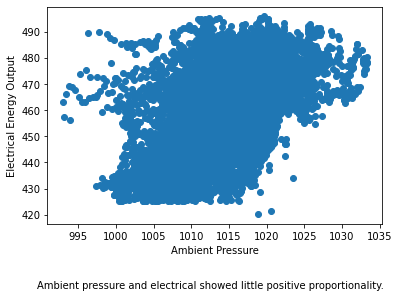

In [10]:
plt.scatter(x=df.AP,y=df.PE)
plt.xlabel('Ambient Pressure')
plt.ylabel('Electrical Energy Output')
plt.figtext(x=0.1,y=-0.1,s='Ambient pressure and electrical showed little positive proportionality.')

Text(0.1, -0.1, 'Relative humidity and electrical showed little positive proportionality.')

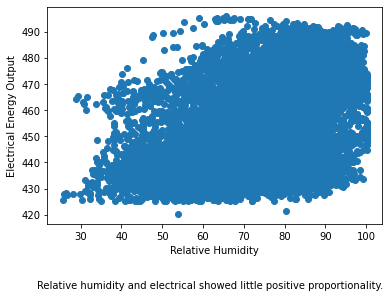

In [11]:
plt.scatter(x=df.RH,y=df.PE)
plt.xlabel('Relative Humidity')
plt.ylabel('Electrical Energy Output')
plt.figtext(x=0.1,y=-0.1,s='Relative humidity and electrical showed little positive proportionality.')

### (iii)

In [12]:
df.AT.describe()

count    9568.000000
mean       19.651231
std         7.452473
min         1.810000
25%        13.510000
50%        20.345000
75%        25.720000
max        37.110000
Name: AT, dtype: float64

In [13]:
table=[[df.AT.mean(),df.AT.median(),(df.AT.max()-df.AT.mean()),np.percentile(df.AT, 25,interpolation='midpoint'),np.percentile(df.AT, 75, interpolation = 'midpoint'),np.percentile(df.AT, 75,interpolation='midpoint')-np.percentile(df.AT, 25,interpolation='midpoint')],
       [df.V.mean(),df.V.median(),(df.V.max()-df.V.mean()),np.percentile(df.V, 25,interpolation='midpoint'),np.percentile(df.V, 75, interpolation = 'midpoint'),np.percentile(df.V, 75,interpolation='midpoint')-np.percentile(df.V, 25,interpolation='midpoint')],
       [df.AP.mean(),df.AP.median(),(df.AP.max()-df.AP.mean()),np.percentile(df.AP, 25,interpolation='midpoint'),np.percentile(df.AP, 75, interpolation = 'midpoint'),np.percentile(df.AP, 75,interpolation='midpoint')-np.percentile(df.AP, 25,interpolation='midpoint')],
       [df.RH.mean(),df.RH.median(),(df.RH.max()-df.AT.mean()),np.percentile(df.RH, 25,interpolation='midpoint'),np.percentile(df.RH, 75, interpolation = 'midpoint'),np.percentile(df.RH, 75,interpolation='midpoint')-np.percentile(df.RH, 25,interpolation='midpoint')],
       [df.PE.mean(),df.PE.median(),(df.PE.max()-df.PE.mean()),np.percentile(df.PE, 25,interpolation='midpoint'),np.percentile(df.PE, 75, interpolation = 'midpoint'),np.percentile(df.PE, 75,interpolation='midpoint')-np.percentile(df.PE, 25,interpolation='midpoint')]
       ]
table

[[19.65123118729102,
  20.345,
  17.45876881270898,
  13.51,
  25.72,
  12.209999999999999],
 [54.30580372073601,
  52.08,
  27.254196279263994,
  41.74,
  66.54,
  24.800000000000004],
 [1013.2590781772603,
  1012.94,
  20.04092182273962,
  1009.1,
  1017.26,
  8.159999999999968],
 [73.30897784280926,
  74.975,
  80.50876881270898,
  63.325,
  84.83,
  21.504999999999995],
 [454.3650094063554,
  451.54999999999995,
  41.39499059364459,
  439.75,
  468.43,
  28.680000000000007]]

In [14]:
df_table=pd.DataFrame(table)
df_table.columns=['mean','median','range','1st_percentile','3rd_percentile','interquartile range']
df_table.index=['AT','V','AP','RH','PE']
df_table

,mean,median,range,1st_percentile,3rd_percentile,interquartile range
AT,19.651231,20.345,17.458769,13.510,25.72,12.210
V,54.305804,52.080,27.254196,41.740,66.54,24.800
AP,1013.259078,1012.940,20.040922,1009.100,1017.26,8.160
RH,73.308978,74.975,80.508769,63.325,84.83,21.505
PE,454.365009,451.550,41.394991,439.750,468.43,28.680


## (c) 

In [15]:
model=LinearRegression(normalize=True)

In [16]:
# AT to PE
x=df.AT
y=df.PE
x=np.array(x)
x=x.reshape(-1,1)
#y=np.array(y)
#y=y.reshape(-1,1)
model.fit(x,y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8989475964148236


In [17]:
# V to PE
x=df.V
y=df.PE
x=np.array(x)
x=x.reshape(-1,1)
#y=np.array(y)
#y=y.reshape(-1,1)
model.fit(x,y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7565177870683979


In [18]:
# AP to PE
x=df.AP
y=df.PE
x=np.array(x)
x=x.reshape(-1,1)
#y=np.array(y)
#y=y.reshape(-1,1)
model.fit(x,y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.2687686564110674


In [19]:
# RH to PE
x=df.RH
y=df.PE
x=np.array(x)
x=x.reshape(-1,1)
#y=np.array(y)
#y=y.reshape(-1,1)
model.fit(x,y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.15193944023117567


In [20]:
res_AT = ttest_ind(df.AT, df.PE).pvalue
res = ttest_ind(df.AT, df.PE)
print(res)
print('P value = %.4f' %res_AT)

Ttest_indResult(statistic=-2283.288938091925, pvalue=0.0)
P value = 0.0000


In [21]:
res_V = ttest_ind(df.V, df.PE).pvalue
res = ttest_ind(df.V, df.PE)
print(res)
print('P value = %.4f' %res_V)

Ttest_indResult(statistic=-1839.0547429247533, pvalue=0.0)
P value = 0.0000


In [22]:
res_AP = ttest_ind(df.AP, df.PE).pvalue
res = ttest_ind(df.AP, df.PE)
print(res)
print('P value = %.4f' %res_AP)

Ttest_indResult(statistic=3025.2708470344937, pvalue=0.0)
P value = 0.0000


In [23]:
res_RH = ttest_ind(df.RH, df.PE).pvalue
res = ttest_ind(df.RH, df.PE)
print(res)
print('P value = %.4f' %res_RH)

Ttest_indResult(statistic=-1659.5497984692024, pvalue=0.0)
P value = 0.0000


In [24]:
print("All predictors are statistically significance with a P-value of 0.0000")

All predictors are statistically significance with a P-value of 0.0000


In [25]:
# build model for AT and PE
X_train, X_test, Y_train, Y_test = train_test_split(df.AT, df.PE, test_size=0.2, random_state=101)
X_train=np.array(X_train)
X_train=X_train.reshape(-1,1)
X_test=np.array(X_test)
X_test=X_test.reshape(-1,1)

In [26]:
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

In [27]:
MAE = mean_absolute_error(Y_test,y_pred)
MSE = mean_squared_error(Y_test,y_pred)

In [28]:
print(f'MAE = {MAE}, MSE= {MSE}')
print(f"Coefficients: {model.coef_}")

MAE = 4.250416687210999, MSE= 29.725105040921118
Coefficients: [-2.17411154]


Text(0, 0.5, 'PE')

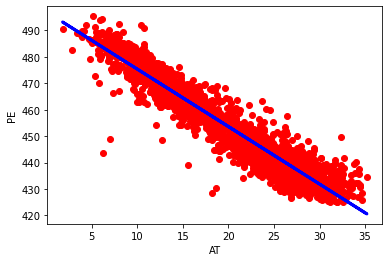

In [29]:
plt.scatter(X_test, Y_test, color="red")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.show
plt.xlabel('AT')
plt.ylabel('PE')

In [30]:
# build model for V and PE
X_train, X_test, Y_train, Y_test = train_test_split(df.V, df.PE, test_size=0.2, random_state=101)
X_train=np.array(X_train)
X_train=X_train.reshape(-1,1)
X_test=np.array(X_test)
X_test=X_test.reshape(-1,1)

In [31]:
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

MAE = mean_absolute_error(Y_test,y_pred)
MSE = mean_squared_error(Y_test,y_pred)

print(f'MAE = {MAE}, MSE= {MSE}')
print(f"Coefficients: {model.coef_}")

MAE = 6.531626076422563, MSE= 71.42203710566083
Coefficients: [-1.17106867]


Text(0.1, -0.1, 'Some outliers can be detected when V is less than 30.')

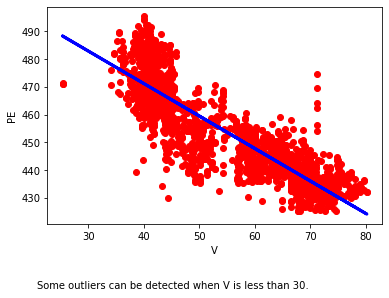

In [32]:
plt.scatter(X_test, Y_test, color="red")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.show
plt.xlabel('V')
plt.ylabel('PE')
plt.figtext(x=0.1,y=-0.1,s='Some outliers can be detected when V is less than 30.')

In [33]:
# build model for AP and PE
X_train, X_test, Y_train, Y_test = train_test_split(df.AP, df.PE, test_size=0.2, random_state=101)
X_train=np.array(X_train)
X_train=X_train.reshape(-1,1)
X_test=np.array(X_test)
X_test=X_test.reshape(-1,1)

In [34]:
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

MAE = mean_absolute_error(Y_test,y_pred)
MSE = mean_squared_error(Y_test,y_pred)

print(f'MAE = {MAE}, MSE= {MSE}')
print(f"Coefficients: {model.coef_}")

MAE = 12.031346280357827, MSE= 213.5516008855585
Coefficients: [1.50676969]


Text(0.1, -0.1, 'Some outliers can be detected when AP is small and PE is high.')

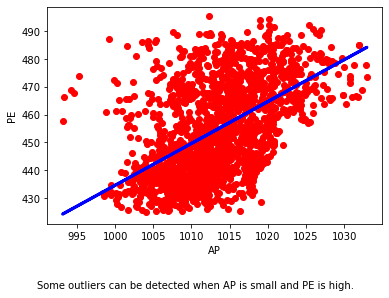

In [35]:
plt.scatter(X_test, Y_test, color="red")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.show
plt.xlabel('AP')
plt.ylabel('PE')
plt.figtext(x=0.1,y=-0.1,s='Some outliers can be detected when AP is small and PE is high.')

In [36]:
# build model for RH and PE
X_train, X_test, Y_train, Y_test = train_test_split(df.RH, df.PE, test_size=0.2, random_state=101)
X_train=np.array(X_train)
X_train=X_train.reshape(-1,1)
X_test=np.array(X_test)
X_test=X_test.reshape(-1,1)

In [37]:
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

MAE = mean_absolute_error(Y_test,y_pred)
MSE = mean_squared_error(Y_test,y_pred)

print(f'MAE = {MAE}, MSE= {MSE}')
print(f"Coefficients: {model.coef_}")

MAE = 13.149284348695371, MSE= 240.56870591741423
Coefficients: [0.45438737]


Text(0, 0.5, 'PE')

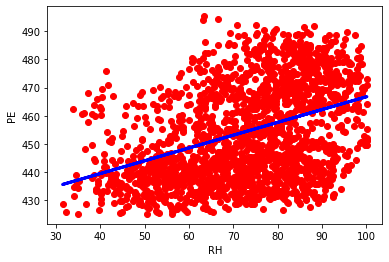

In [38]:
plt.scatter(X_test, Y_test, color="red")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.show
plt.xlabel('RH')
plt.ylabel('PE')


In [39]:
# OLS for AT and PE
df_AT=pd.DataFrame(df.AT)
df_AT['coef']=1

results=sm.OLS(df.PE,df_AT).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:39:31   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -2.1713      0.007   -291.715      0.0

In [40]:
coef_AT=results.params
coef_AT

AT       -2.17132
coef    497.03412
dtype: float64

#### The result showed that AT is a significant variable that is not affected by error much.

In [41]:
# OLS for V
df_V=pd.DataFrame(df.V)
df_V['coef']=1

results=sm.OLS(df.PE,df_V).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:39:31   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
V             -1.1681      0.007   -172.402      0.0

In [42]:
coef_V=results.params
coef_V

V        -1.168135
coef    517.801526
dtype: float64

#### For V, the p value is low but r-squared is not quite as high as the r-squared for AT, which means that V is affected by the error a bit more.

In [43]:
# OLS for AP
df_AP=pd.DataFrame(df.AP)
df_AP['coef']=1

results=sm.OLS(df.PE,df_AP).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:39:31   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AP             1.4899      0.025     59.296      0.0

In [44]:
coef_AP=results.params
coef_AP

AP         1.489872
coef   -1055.260989
dtype: float64

#### The r-squared value is low for AP, which means that AP is heavily affected by errors

In [45]:
# OLS for RH
df_RH=pd.DataFrame(df.RH)
df_RH['coef']=1

results=sm.OLS(df.PE,df_RH).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:39:31   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RH             0.4557      0.011     41.399      0.0

In [46]:
coef_RH=results.params
coef_RH

RH        0.455650
coef    420.961766
dtype: float64

#### The r-squared value is low for RH, which means that RH is heavily affected by errors

#### Overall for question (c), AT and V are statistically significant and not affected much by error.

## (d) 

In [47]:
# prepare data
df=pd.DataFrame(data)
x=df.drop('PE',axis=1)
x['coef']=1
y=df.PE
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=101)
X_train

,AT,V,AP,RH,coef
8380,23.97,64.33,1010.54,84.65,1
4816,17.89,42.42,1008.92,65.08,1
738,10.57,36.71,1022.62,80.49,1
2029,25.18,61.08,1013.08,80.75,1
8362,3.40,39.64,1011.10,83.43,1
...,...,...,...,...,...
599,8.99,39.04,1021.99,75.98,1
5695,27.54,74.22,1007.44,75.91,1
8006,11.48,37.50,1014.38,69.75,1
1361,6.79,39.37,1019.79,72.39,1


In [48]:
results=sm.OLS(Y_train,X_train).fit()
print(results.summary())
coef_mr=results.params
coef_mr=pd.DataFrame(coef_mr)
coef_mr.index=['AT','V','AP','RH','Intercept']
coef_mr

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 2.526e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:39:31   Log-Likelihood:                -22435.
No. Observations:                7654   AIC:                         4.488e+04
Df Residuals:                    7649   BIC:                         4.491e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.9765      0.017   -116.447      0.0

,0
AT,-1.976540
V,-0.235907
AP,0.063026
RH,-0.158631
Intercept,453.799144


In [49]:
y_pred=results.predict(X_test)
MSE = mean_squared_error(Y_test,y_pred)
MSE

21.510824811862197

In [50]:
print('According to the model, all four predictors are statistically significant, as the P value are all low.')
print('Thus we do not reject any null hypothesis.')

According to the model, all four predictors are statistically significant, as the P value are all low.
Thus we do not reject any null hypothesis.


## (e)

In [51]:
coef_lr=[]
coef_lr.append(coef_AT[0])
coef_lr.append(coef_V[0])
coef_lr.append(coef_AP[0])
coef_lr.append(coef_RH[0])
#coef_lr.append(coef_coef[0])
coef_lr

[-2.171319958517809,
 -1.1681351265557183,
 1.4898716733991095,
 0.45565010226298186]

(-2.5, 1.6)

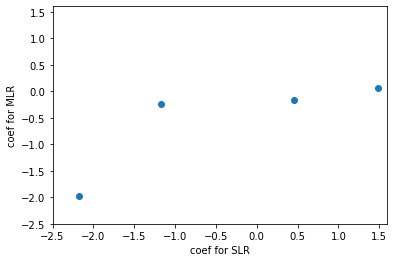

In [52]:
plt.scatter(x=coef_lr,y=coef_mr[0:4])
plt.xlabel('coef for SLR')
plt.xlim((-2.5,1.6))
plt.ylabel('coef for MLR')
plt.ylim((-2.5,1.6))

In [53]:
print('The coefficients for multiple linear regression occurs more to the negative end, due to correlation between variables')

The coefficients for multiple linear regression occurs more to the negative end, due to correlation between variables


## (f) 

In [54]:
from sklearn.preprocessing import PolynomialFeatures


In [55]:

poly=PolynomialFeatures(3)

In [56]:
# for AT and PE

x=df.AT
y=df.PE


X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=101)
#X_train=np.array(X_train)
#X_train=X_train.reshape(-1,1)
X_train=pd.DataFrame(X_train)

X_test=pd.DataFrame(X_test)

In [57]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)

In [58]:
model=LinearRegression()
model.fit(X_train_poly,Y_train)
coef=model.coef_
intercept=model.intercept_

y_pred = model.predict(X_test_poly)
MSE = mean_squared_error(Y_test,y_pred)
print(f'MSE: {MSE}')

MSE: 25.854267763798074


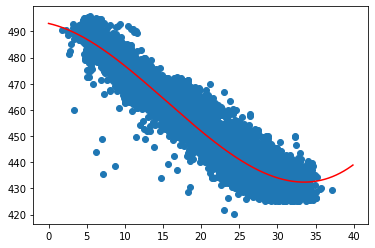

In [59]:
x_axis=np.arange(0,40,0.1)
response=intercept+coef[1]*x_axis+coef[2]*x_axis**2 +coef[3]*x_axis**3

plt.scatter(df.AT,df.PE)
plt.plot(x_axis,response,color='red')

In [60]:
# for V and PE

poly=PolynomialFeatures(3)

x=df.V
y=df.PE

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=101)
#X_train=np.array(X_train)
#X_train=X_train.reshape(-1,1)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)

model=LinearRegression()
model.fit(X_train_poly,Y_train)
coef=model.coef_
intercept=model.intercept_

y_pred = model.predict(X_test_poly)
MSE = mean_squared_error(Y_test,y_pred)
print(f'MSE: {MSE}')

MSE: 65.39617078708966


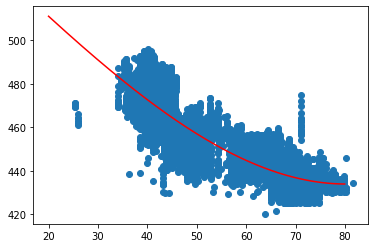

In [61]:
x_axis=np.arange(20,80,0.1)
response=intercept+coef[1]*x_axis+coef[2]*x_axis**2 +coef[3]*x_axis**3

plt.scatter(df.V,df.PE)
plt.plot(x_axis,response,color='red')

In [62]:
# for AP and PE

poly=PolynomialFeatures(3)

x=df.AP
y=df.PE

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=101)
#X_train=np.array(X_train)
#X_train=X_train.reshape(-1,1)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)

model=LinearRegression()
model.fit(X_train_poly,Y_train)
coef=model.coef_
intercept=model.intercept_

y_pred = model.predict(X_test_poly)
MSE = mean_squared_error(Y_test,y_pred)
print(f'MSE: {MSE}')

MSE: 204.03565347721724


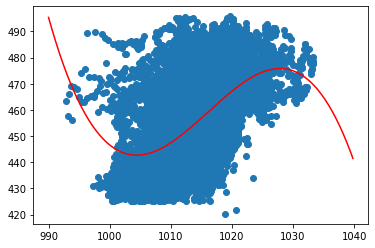

In [63]:
x_axis=np.arange(990,1040,0.2)
response=intercept+coef[1]*x_axis+coef[2]*x_axis**2 +coef[3]*x_axis**3

plt.scatter(df.AP,df.PE)
plt.plot(x_axis,response,color='red')

In [64]:
# for RH and PE

poly=PolynomialFeatures(3)

x=df.RH
y=df.PE

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=101)
#X_train=np.array(X_train)
#X_train=X_train.reshape(-1,1)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)

model=LinearRegression()
model.fit(X_train_poly,Y_train)
coef=model.coef_
intercept=model.intercept_

y_pred = model.predict(X_test_poly)
MSE = mean_squared_error(Y_test,y_pred)
print(f'MSE: {MSE}')

MSE: 239.95045469121703


In [65]:
y_pred=model.predict(X_test_poly)
y_pred

array([460.20733325, 464.39937255, 450.54136462, ..., 455.50452805,
       443.60223817, 462.40244362])

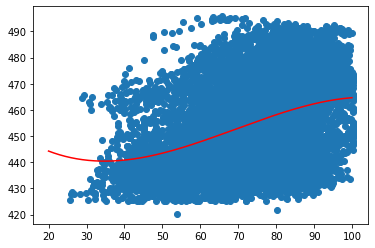

In [66]:
x_axis=np.arange(20,100,0.1)
response=intercept+coef[1]*x_axis+coef[2]*x_axis**2 +coef[3]*x_axis**3

plt.scatter(df.RH,df.PE)
#plt.plot(X_test,y_pred,color='red')
plt.plot(x_axis,response,color='red')

#### The MSE for AT, V, and AP are lower in polynomial models, indicating that threre are certain levels of nonlinear association in the predictors

## (g)

In [67]:
df_2=df.copy()
df_2['AT*V']=df_2['AT']*df_2['V']
df_2['AT*AP']=df_2['AT']*df_2['AP']
df_2['AT*RH']=df_2['AT']*df_2['RH']
df_2['V*AP']=df_2['V']*df_2['AP']
df_2['V*RH']=df_2['V']*df_2['RH']
df_2['AP*RH']=df_2['AP']*df_2['RH']
df_2['coef']=1
df_2

,AT,V,AP,RH,PE,AT*V,AT*AP,AT*RH,V*AP,V*RH,AP*RH,coef
0,14.96,41.76,1024.07,73.17,463.26,624.7296,15320.0872,1094.6232,42765.1632,3055.5792,74931.2019,1
1,25.18,62.96,1020.04,59.08,444.37,1585.3328,25684.6072,1487.6344,64221.7184,3719.6768,60263.9632,1
2,5.11,39.40,1012.16,92.14,488.56,201.3340,5172.1376,470.8354,39879.1040,3630.3160,93260.4224,1
3,20.86,57.32,1010.24,76.64,446.48,1195.6952,21073.6064,1598.7104,57906.9568,4393.0048,77424.7936,1
4,10.82,37.50,1009.23,96.62,473.90,405.7500,10919.8686,1045.4284,37846.1250,3623.2500,97511.8026,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03,827.3385,16883.2665,1515.1500,50386.1569,4521.7900,92274.9100,1
9564,13.19,39.18,1023.67,66.78,469.62,516.7842,13502.2073,880.8282,40107.3906,2616.4404,68360.6826,1
9565,31.32,74.33,1012.92,36.48,429.57,2328.0156,31724.6544,1142.5536,75290.3436,2711.5584,36951.3216,1
9566,24.48,69.45,1013.86,62.39,435.74,1700.1360,24819.2928,1527.3072,70412.5770,4332.9855,63254.7254,1


In [68]:
# prepare data
x=df_2.drop('PE',axis=1)
y=df_2.PE
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3)

In [69]:
results=sm.OLS(Y_train,X_train).fit()
print(results.summary())
coef_mr=results.params

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9937.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:39:32   Log-Likelihood:                -19265.
No. Observations:                6697   AIC:                         3.855e+04
Df Residuals:                    6686   BIC:                         3.863e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -4.5488      2.835     -1.604      0.1

In [70]:
pred=results.predict(X_test)

In [71]:
MSE = mean_squared_error(Y_test,pred)

In [72]:
MSE

18.790218641107415

#### The result showed that AT * V, AT * RH, V * AP, adn AP * RH are statistically significant.
#### However, AT and AP becomes insignificant, indicating that when taken into account the interactions between variables,\nAT and AP along may not be a strong variable.

In [73]:
LR=LinearRegression(normalize=True)

In [74]:
LR.fit(X_train,Y_train)

LinearRegression(normalize=True)

In [75]:
LR.coef_

array([-4.54881919e+00, -7.94613373e+00, -2.19063391e-01,  9.78593204e-01,
        2.12146299e-02,  1.95757053e-03, -5.42162055e-03,  7.04986029e-03,
        1.19617051e-03, -1.04097091e-03,  0.00000000e+00])

In [76]:
LR.intercept_

754.6568770320694

## (h)

In [77]:
df3=df_2.copy()
df3['AT**2']=df3.AT*df3.AT
df3['V**2']=df3.V*df3.V
df3['AP**2']=df3.AP*df3.AP
df3['RH**2']=df3.RH*df3.RH

df3

,AT,V,AP,RH,PE,AT*V,AT*AP,AT*RH,V*AP,V*RH,AP*RH,coef,AT**2,V**2,AP**2,RH**2
0,14.96,41.76,1024.07,73.17,463.26,624.7296,15320.0872,1094.6232,42765.1632,3055.5792,74931.2019,1,223.8016,1743.8976,1.048719e+06,5353.8489
1,25.18,62.96,1020.04,59.08,444.37,1585.3328,25684.6072,1487.6344,64221.7184,3719.6768,60263.9632,1,634.0324,3963.9616,1.040482e+06,3490.4464
2,5.11,39.40,1012.16,92.14,488.56,201.3340,5172.1376,470.8354,39879.1040,3630.3160,93260.4224,1,26.1121,1552.3600,1.024468e+06,8489.7796
3,20.86,57.32,1010.24,76.64,446.48,1195.6952,21073.6064,1598.7104,57906.9568,4393.0048,77424.7936,1,435.1396,3285.5824,1.020585e+06,5873.6896
4,10.82,37.50,1009.23,96.62,473.90,405.7500,10919.8686,1045.4284,37846.1250,3623.2500,97511.8026,1,117.0724,1406.2500,1.018545e+06,9335.4244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03,827.3385,16883.2665,1515.1500,50386.1569,4521.7900,92274.9100,1,277.2225,2469.0961,1.028216e+06,8281.0000
9564,13.19,39.18,1023.67,66.78,469.62,516.7842,13502.2073,880.8282,40107.3906,2616.4404,68360.6826,1,173.9761,1535.0724,1.047900e+06,4459.5684
9565,31.32,74.33,1012.92,36.48,429.57,2328.0156,31724.6544,1142.5536,75290.3436,2711.5584,36951.3216,1,980.9424,5524.9489,1.026007e+06,1330.7904
9566,24.48,69.45,1013.86,62.39,435.74,1700.1360,24819.2928,1527.3072,70412.5770,4332.9855,63254.7254,1,599.2704,4823.3025,1.027912e+06,3892.5121


In [78]:
x=df3.drop('PE',axis=1)
y=df3.PE
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3,random_state=70)

In [79]:
results=sm.OLS(Y_train,X_train).fit()
print(results.summary())
coef_result=results.params

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7197.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:39:32   Log-Likelihood:                -19173.
No. Observations:                6697   AIC:                         3.838e+04
Df Residuals:                    6682   BIC:                         3.848e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -6.9731      3.603     -1.935      0.0

In [80]:
y_pred_all=results.predict(X_test)

In [81]:
MSE_test_all = mean_squared_error(Y_test,y_pred_all)
print(f'The MSE for testing set is {MSE_test_all}')

The MSE for testing set is 18.488660568663555


In [82]:
y_pred_train_all=results.predict(X_train)
MSE_train_all=mean_squared_error(Y_train,y_pred_train_all)
print(f'The MSE for training set is {MSE_train_all}')

The MSE for training set is 17.9543106152726


In [83]:
print('Drop AT, AT*AP, V*AP, V*RH, V**2 and V since the p value is too high')

Drop AT, AT*AP, V*AP, V*RH, V**2 and V since the p value is too high


In [84]:
df4=df3.copy()
df4=df4.drop(['AT','AT*AP','V*AP','V*RH','V','V**2'],axis=1)
df4

,AP,RH,PE,AT*V,AT*RH,AP*RH,coef,AT**2,AP**2,RH**2
0,1024.07,73.17,463.26,624.7296,1094.6232,74931.2019,1,223.8016,1.048719e+06,5353.8489
1,1020.04,59.08,444.37,1585.3328,1487.6344,60263.9632,1,634.0324,1.040482e+06,3490.4464
2,1012.16,92.14,488.56,201.3340,470.8354,93260.4224,1,26.1121,1.024468e+06,8489.7796
3,1010.24,76.64,446.48,1195.6952,1598.7104,77424.7936,1,435.1396,1.020585e+06,5873.6896
4,1009.23,96.62,473.90,405.7500,1045.4284,97511.8026,1,117.0724,1.018545e+06,9335.4244
...,...,...,...,...,...,...,...,...,...,...
9563,1014.01,91.00,460.03,827.3385,1515.1500,92274.9100,1,277.2225,1.028216e+06,8281.0000
9564,1023.67,66.78,469.62,516.7842,880.8282,68360.6826,1,173.9761,1.047900e+06,4459.5684
9565,1012.92,36.48,429.57,2328.0156,1142.5536,36951.3216,1,980.9424,1.026007e+06,1330.7904
9566,1013.86,62.39,435.74,1700.1360,1527.3072,63254.7254,1,599.2704,1.027912e+06,3892.5121


In [85]:
x=df4.drop('PE',axis=1)
y=df4.PE
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3,random_state=70)

results=sm.OLS(Y_train,X_train).fit()
print(results.summary())
coef_result=results.params

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 1.121e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:39:32   Log-Likelihood:                -19538.
No. Observations:                6697   AIC:                         3.909e+04
Df Residuals:                    6688   BIC:                         3.916e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AP            11.3681      2.252      5.048      0.0

In [86]:
y_pred_dropped=results.predict(X_test)
MSE = mean_squared_error(Y_test,y_pred_dropped)
print(f"The MSE for the updated testing set is {MSE}")

The MSE for the updated testing set is 20.56004582832093


In [87]:
y_pred_train_dropped=results.predict(X_train)
MSE_train_dropped = mean_squared_error(Y_train,y_pred_train_dropped)
print(f"The MSE for the updated training set is {MSE_train_dropped}")

The MSE for the updated training set is 20.026746553153174


#### After dropping insignificant variables, the MSE became higher. This indicates that when all variables are included,the model may have overfitting issues.
#### The model in which insignificant variables are dropped showed better result compared to the model when only interactions between variables are included.

## (i)

In [88]:
# KNN using raw features for testing set

In [89]:
from sklearn.neighbors import KNeighborsRegressor

In [90]:
x=df4.drop('PE',axis=1)
y=df4.PE
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3)

In [91]:
MSE_table=[]
for k in range(1,101,1):
    knn=KNeighborsRegressor(n_neighbors=k,p=2)
    knn.fit(X_train,Y_train)
    y_pred=knn.predict(X_test)
    MSE=mean_squared_error(Y_test,y_pred)
    MSE_table.append([k,MSE])

In [92]:
MSE_table=pd.DataFrame(MSE_table)
MSE_table.columns=['k','MSE']
min_MSE=MSE_table.MSE.min()

In [93]:
MSE_table[MSE_table.MSE==min_MSE]

,k,MSE
2,3,53.733685


In [94]:
y_pred=knn.predict(X_test)

In [95]:
MSE=mean_squared_error(Y_test,y_pred)
MSE

139.66889499907697

Text(0.5, 1.0, 'Testing error for raw features')

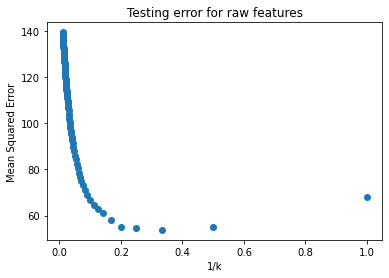

In [96]:
plt.scatter(x=(1/MSE_table.k),y=MSE_table.MSE)
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.title('Testing error for raw features')

In [97]:
# Knn using raw features for training set

In [98]:
x=df4.drop('PE',axis=1)
y=df4.PE
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3)

In [99]:
MSE_table_train=[]
for k in range(1,101,1):
    knn=KNeighborsRegressor(n_neighbors=k,p=2)
    knn.fit(X_train,Y_train)
    y_pred=knn.predict(X_train)
    MSE=mean_squared_error(Y_train,y_pred)
    MSE_table_train.append([k,MSE])

In [100]:
MSE_table_train=pd.DataFrame(MSE_table_train)
MSE_table_train.columns=['k','MSE']
min_MSE=MSE_table_train.MSE.min()


In [101]:
MSE_table_train[MSE_table_train.MSE==min_MSE]



,k,MSE
0,1,0.0


Text(0.5, 1.0, 'Training error for raw features')

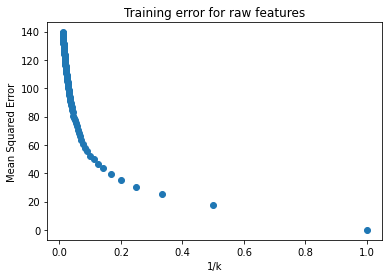

In [102]:
plt.scatter(x=(1/MSE_table_train.k),y=MSE_table_train.MSE)
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.title('Training error for raw features')

In [103]:
y_pred=knn.predict(X_test)
MSE=mean_squared_error(Y_test,y_pred)

In [104]:
# Knn using normalized features for testing set

In [105]:
x=df4.drop('PE',axis=1)
y=df4.PE
x=preprocessing.normalize(x)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3)

In [106]:
MSE_table_nor=[]
for k in range(1,101,1):
    knn=KNeighborsRegressor(n_neighbors=k,p=2)
    knn.fit(X_train,Y_train)
    y_pred=knn.predict(X_test)
    MSE=mean_squared_error(Y_test,y_pred)
    MSE_table_nor.append([k,MSE])

In [107]:
MSE_table_nor=pd.DataFrame(MSE_table_nor)
MSE_table_nor.columns=['k','MSE']
min_MSE=MSE_table_nor.MSE.min()

In [108]:
MSE_table_nor[MSE_table_nor.MSE==min_MSE]

,k,MSE
7,8,22.430033


Text(0.5, 1.0, 'Testing error for normalized features')

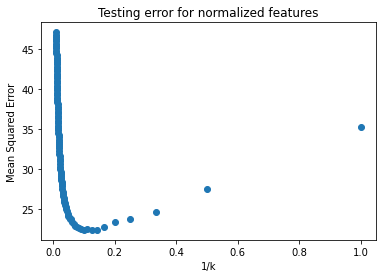

In [109]:
plt.scatter(x=(1/MSE_table_nor.k),y=MSE_table_nor.MSE)
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.title('Testing error for normalized features')

In [110]:
# Knn using normalized features for training set

In [111]:
x=df4.drop('PE',axis=1)
y=df4.PE
x=preprocessing.normalize(x)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3)

In [112]:
MSE_table_nor_train=[]
for k in range(1,101,1):
    knn=KNeighborsRegressor(n_neighbors=k,p=2)
    knn.fit(X_train,Y_train)
    y_pred=knn.predict(X_train)
    MSE=mean_squared_error(Y_train,y_pred)
    MSE_table_nor_train.append([k,MSE])

In [113]:
MSE_table_nor_train=pd.DataFrame(MSE_table_nor_train)
MSE_table_nor_train.columns=['k','MSE']
min_MSE=MSE_table_nor_train.MSE.min()

In [114]:
MSE_table_nor_train[MSE_table_nor_train.MSE==min_MSE]

,k,MSE
0,1,0.0


Text(0.5, 1.0, 'Training error for normalized features')

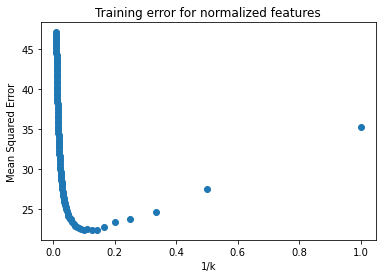

In [115]:
plt.scatter(x=(1/MSE_table_nor.k),y=MSE_table_nor.MSE)
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.title('Training error for normalized features')

## (j)

In [116]:
print('The smallest test error gained from linear regression is 18.49, where all interactions and quadratic nonlinearities are taken into account.')
print('Whe insignificant variables are dropped, the mean-squared-error become 20.56.')
print('The smallest test error gained from KNN is 23.69, where data is normalized.')
print('We can conclude that linear regression is a better model in this case study.')

The smallest test error gained from linear regression is 18.49, where all interactions and quadratic nonlinearities are taken into account.
Whe insignificant variables are dropped, the mean-squared-error become 20.56.
The smallest test error gained from KNN is 23.69, where data is normalized.
We can conclude that linear regression is a better model in this case study.


# 2 and 3

In [117]:
img=image.imread('552_HW2.jpeg')

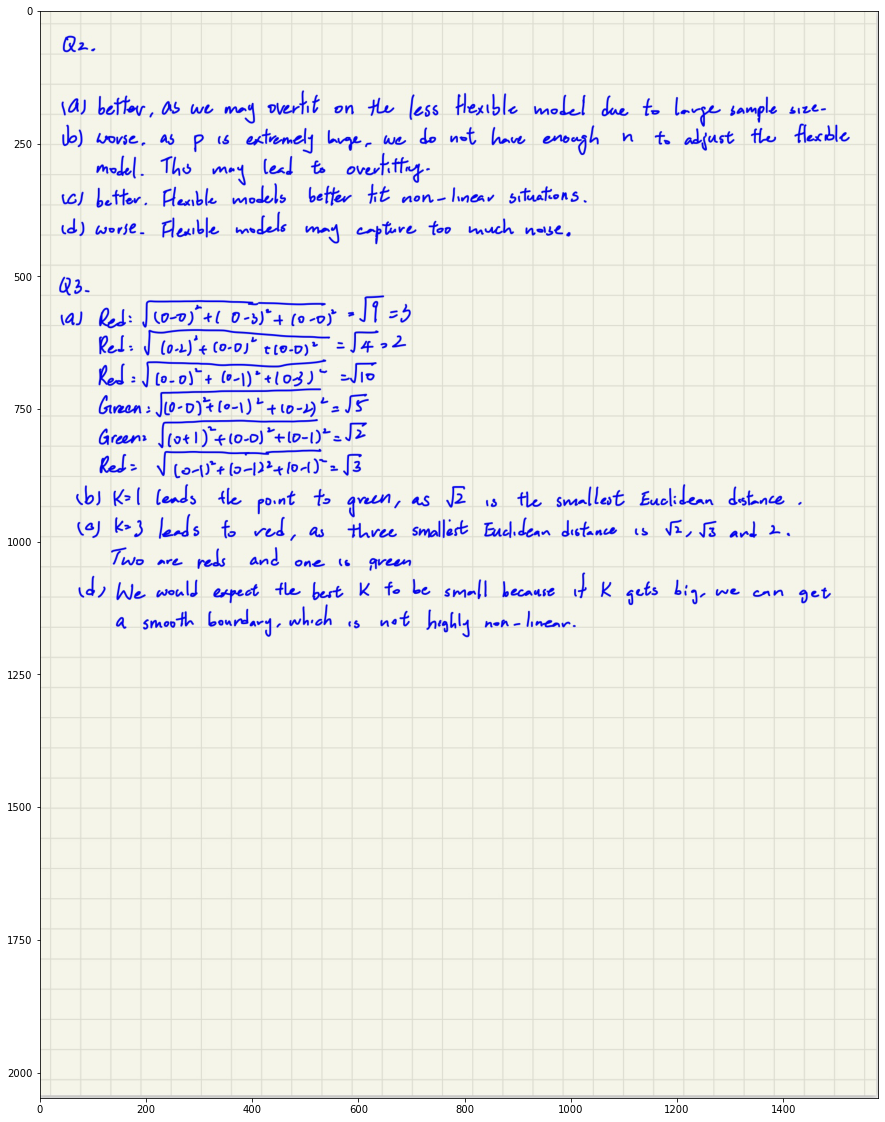

In [118]:
plt.figure(figsize = (50,20))

plt.imshow(img)

plt.show()